<h1 style="text-align:center;">Reinforcement Learning: Balancing a CartPole using Q-Learning</h1>
<p style="text-align:center;">
Nazar Khan
<br>CVML Lab
<br>University of The Punjab
</p>

This tutorial helps you get started with OpenAI Gymnasium (the updated version of OpenAI Gym) for reinforcement learning. This tutorial will provide a visual, hands-on experience, where you can see how an agent learns in a simple environment. We'll use **CartPole** as the example environment, which is one of the classic environments in RL.

### **Getting Started with OpenAI Gymnasium: A Visual Tutorial**

In this tutorial, you will learn how to:
1. Install OpenAI Gymnasium and dependencies.
2. Understand the CartPole environment.
3. Create and train a reinforcement learning agent using Q-learning.
4. Visualize how the agent learns over time.


---

### **Step 1: Install OpenAI Gymnasium and Dependencies**

First, you need to install **OpenAI Gymnasium** (Gym’s newer version) and some other dependencies.

#### Install the necessary libraries:
```bash
pip install gymnasium[all] numpy matplotlib
```

- `gymnasium[all]`: This installs all the environments (including the classic CartPole environment) and necessary dependencies.
- `numpy`: For array and matrix manipulations.
- `matplotlib`: For visualizing the training process.

---

### **Step 2: Import Libraries and Set Up the CartPole Environment**

Let’s start by importing the necessary libraries and initializing the **CartPole** environment.

In [13]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

# Create the CartPole environment
env = gym.make("CartPole-v1", render_mode='rgb_array')
print(env)

# Reset the environment to start
observation, info = env.reset()
print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>
Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action Space: Discrete(2)


- `gym.make("CartPole-v1")`: This initializes the CartPole environment.
- `render_mode='human'`: This ensures that the environment renders a visual representation for human viewers.
- `env.reset()`: Resets the environment to its initial state.

The output should display information about the observation and action spaces. For CartPole:
- **Observation space** is a continuous space with 4 elements (Cart position, Cart velocity, Pole angle, Pole velocity).
- **Action space** is discrete: 0 (move left) or 1 (move right).

---

### **Step 3: Define Q-Learning Algorithm**

We'll now define a simple **Q-learning** algorithm for training the agent to balance the pole.

#### Key elements for Q-learning:
1. **Q-table**: A table that stores Q-values for each state-action pair.
2. **Learning Rate (α)**: Determines how quickly the agent updates its Q-values.
3. **Discount Factor (γ)**: Determines the importance of future rewards.
4. **Exploration-Exploitation (ε)**: Determines the agent's strategy of exploration (random actions) versus exploitation (choosing the best-known action).

In [18]:
# Parameters for Q-Learning
alpha = 0.1      # Learning rate
gamma = 0.99     # Discount factor
epsilon = 0.1    # Exploration rate
n_episodes = 30000 # Number of episodes for training

# Initialize Q-table (for discrete states)
n_actions = env.action_space.n
q_table = np.zeros((24, 24, 24, 24, n_actions))  # For CartPole, discretized states (4D)
print("Shape of Q-table: ", q_table.shape)


Shape of Q-table:  (24, 24, 24, 24, 2)



- **Discretizing the continuous state space**: CartPole's state space is continuous, but we’ll discretize it to make Q-learning feasible. Here, the 4 dimensions of the state space are divided into 24 bins each.

---

### **Step 4: Discretize the Continuous State Space**

To apply Q-learning, we need to convert the continuous state space into discrete states. We’ll use `numpy`'s `linspace` to create bins.

In [20]:
# Define state space boundaries and number of bins for each dimension
state_bins = [
    np.linspace(-2.4, 2.4, 24),  # Cart position
    np.linspace(-3.0, 3.0, 24),  # Cart velocity
    np.linspace(-0.5, 0.5, 24),  # Pole angle
    np.linspace(-2.0, 2.0, 24)   # Pole velocity
]

def discretize_state(state):
    """
    Discretize the continuous state to an index in the Q-table.
    """
    state_discretized = []
    for i, (s, bins) in enumerate(zip(state, state_bins)):
        state_discretized.append(np.digitize(s, bins) - 1)
    return tuple(state_discretized)


- `np.digitize(s, bins)` maps each continuous state value to a bin index.
- This discretizes the 4-dimensional state space into 4 indices, each ranging from 0 to 23 (as we have 24 bins for each dimension).


---

### **Step 5: Train the Agent with Q-learning**

Now we will implement the Q-learning training loop. In each episode, the agent will:
1. Choose an action based on an ε-greedy policy.
2. Take the action and observe the new state and reward.
3. Update the Q-table using the Q-learning update rule.

Episode 0/30000, Total Reward: 10.0
Episode 50/30000, Total Reward: 13.0
Episode 100/30000, Total Reward: 9.0
Episode 150/30000, Total Reward: 11.0
Episode 200/30000, Total Reward: 11.0
Episode 250/30000, Total Reward: 10.0
Episode 300/30000, Total Reward: 16.0
Episode 350/30000, Total Reward: 14.0
Episode 400/30000, Total Reward: 9.0
Episode 450/30000, Total Reward: 10.0
Episode 500/30000, Total Reward: 12.0
Episode 550/30000, Total Reward: 9.0
Episode 600/30000, Total Reward: 10.0
Episode 650/30000, Total Reward: 15.0
Episode 700/30000, Total Reward: 10.0
Episode 750/30000, Total Reward: 15.0
Episode 800/30000, Total Reward: 13.0
Episode 850/30000, Total Reward: 8.0
Episode 900/30000, Total Reward: 15.0
Episode 950/30000, Total Reward: 15.0
Episode 1000/30000, Total Reward: 15.0
Episode 1050/30000, Total Reward: 11.0
Episode 1100/30000, Total Reward: 16.0
Episode 1150/30000, Total Reward: 14.0
Episode 1200/30000, Total Reward: 18.0
Episode 1250/30000, Total Reward: 15.0
Episode 1300/

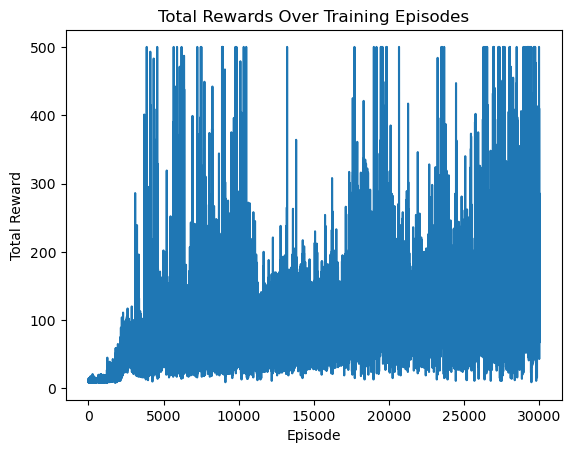

<Figure size 640x480 with 0 Axes>

In [21]:
#env = gym.make("CartPole-v1")#, render_mode='human')
# Training loop
rewards = []

for episode in range(n_episodes):
    state, _ = env.reset()  # Reset environment to start a new episode
    total_reward = 0
    done = False
    
    while not done:
        # Discretize the state
        state_discretized = discretize_state(state)
        
        # Exploration vs Exploitation: Choose action
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore: Random action
        else:
            action = np.argmax(q_table[state_discretized])  # Exploit: Best known action
        
        # Step in the environment
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        # Discretize next state
        next_state_discretized = discretize_state(next_state)
        
        # Q-learning update rule
        q_table[state_discretized + (action,)] = q_table[state_discretized + (action,)] + \
            alpha * (reward + gamma * np.max(q_table[next_state_discretized]) - q_table[state_discretized + (action,)])
        
        total_reward += reward
        state = next_state
        
        if terminated or truncated:
            done = True
    
    rewards.append(total_reward)
    
    if episode % 50 == 0:
        print(f"Episode {episode}/{n_episodes}, Total Reward: {total_reward}")

# Plot the reward curve over episodes
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards Over Training Episodes')
plt.savefig("training_rewards.png")
plt.show()

- **Q-learning update**: After each action, we update the Q-value for the state-action pair using the Q-learning rule.
- **ε-greedy policy**: The agent explores the environment by taking random actions with probability ε and exploits the best-known action with probability 1-ε.
- **Reward visualization**: After training, we plot the total reward achieved by the agent in each episode.

#### When does an episode end?

In our "CartPole-v1" environment, an **episode** ends when one of the following conditions is met:

1. **Pole Angle Exceeds Limit**:  
   The pole's angle exceeds a threshold (±12 degrees from vertical). This threshold is measured in radians internally.

2. **Cart Position Exceeds Bounds**:  
   The cart moves too far to the left or right from the center. Specifically, the cart's position exceeds ±2.4 units from the center of the track.

3. **Maximum Episode Steps**:  
   The environment has a maximum step limit (500 steps for "CartPole-v1"). If this limit is reached without any of the above failures, the episode ends successfully.

**Rewards**:  
   For every step the pole remains upright, the agent receives a reward of +1.  
   Therefore, the total reward in an episode reflects how long the pole was balanced.

**Done Flag**:  
   When the episode ends, the environment returns `done=True`. This indicates that the episode has concluded, and the agent should reset the environment before continuing.

---

### **Step 6: Visualize the Trained Agent and Compare with an Untrained Agent**

To see how the agent performs, you can run the trained agent in the environment for a few episodes and visualize its behavior.

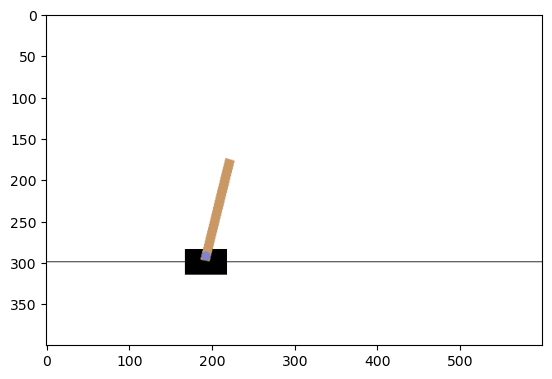

In [27]:
env = gym.make("CartPole-v1", render_mode='rgb_array')
# Test the trained agent
frames=[]
for episode in range(10):
    state, _ = env.reset()
    done = False
    while not done:
        # Discretize the state
        state_discretized = discretize_state(state)
        
        # Choose the action with the highest Q-value (exploitation)
        action = np.argmax(q_table[state_discretized])
        
        # Step in the environment
        state, reward, terminated, truncated, _ = env.step(action)
        
        # Render the environment (to visualize the agent)
        im = env.render()
        frames.append(im)
        
        if terminated or truncated:
            done = True

fig = plt.figure()
img = plt.imshow(frames[0])

def update(frame):
        img.set_data(frames[frame])
        return img

ani = FuncAnimation(fig, update, frames=len(frames), interval=50)
ani.save("CartPoleTrained.mp4", fps=10, writer='ffmpeg')
plt.show()

env.close()


- **Visualizing agent behavior**: After training, the agent will follow the learned policy and you will see it balancing the pole using the **CartPole-v1** environment.
- **`env.render()`**: This will render the environment so you can see the agent's movements during each step.


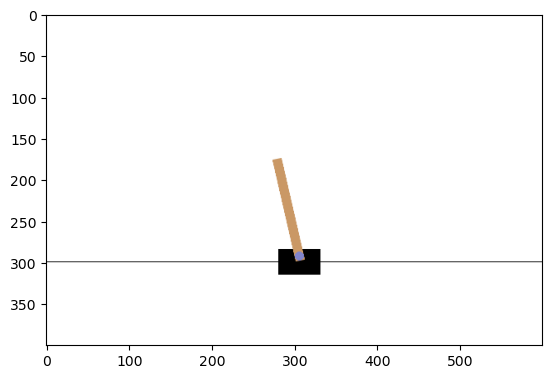

In [28]:
env = gym.make("CartPole-v1", render_mode='rgb_array')
# Test an untrained agent that acts randomly
frames=[]
for episode in range(10):
    state, _ = env.reset()
    done = False
    while not done:
        # Discretize the state
        state_discretized = discretize_state(state)
        
        # Act randomly
        action = np.random.randint(0,2) #randomly generates either 0 or 1
        
        # Step in the environment
        state, reward, terminated, truncated, _ = env.step(action)
        
        # Render the environment (to visualize the agent)
        im = env.render()
        frames.append(im)
        
        if terminated or truncated:
            done = True

fig = plt.figure()
img = plt.imshow(frames[0])

def update(frame):
        img.set_data(frames[frame])
        return img

ani = FuncAnimation(fig, update, frames=len(frames), interval=50)
ani.save("CartPoleUntrained.mp4", fps=10, writer='ffmpeg')
plt.show()

env.close()

---

### **Final Thoughts**

- **Q-learning**: This basic Q-learning algorithm allows you to see how the agent improves over time. As the agent learns, the total reward should increase.
- **Exploration vs Exploitation**: You'll observe that early in training, the agent explores a lot, but over time, it starts exploiting what it has learned.
- **Visualization**: The plots and animations show how the agent's performance improves, and the rendered environment shows its progress in real-time.

This tutorial provided a hands-on, visual approach for teaching reinforcement learning. It allows you to experiment with Q-learning in a simple environment and understand how the agent learns through interaction with the environment.

---

### **Next Steps:**
- Modify the exploration rate (`epsilon`) and observe how it impacts learning.
- Experiment with the number of episodes and see how the agent’s performance changes.
- Try training the agent in different environments in Gymnasium, such as **MountainCar-v0** or **FrozenLake-v1**.
